In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [2]:
# Read in data
data = pd.read_csv('./LimitedData.csv')
data.head(100)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,1424,38817,34126,Organic Italian Parsley Bunch,4,produce,16,fresh herbs,11,4,9,8,13,1,Organic,Vegitarian,Yes
1,1424,38817,30391,Organic Cucumber,4,produce,83,fresh vegetables,11,4,9,8,11,1,Organic,Vegitarian,Yes
2,1424,38817,37646,Organic Gala Apples,4,produce,24,fresh fruits,11,4,9,8,9,1,Organic,Vegitarian,Yes
3,1424,38817,43122,Organic Bartlett Pear,4,produce,24,fresh fruits,11,4,9,8,8,1,Organic,Vegitarian,Yes
4,1424,38817,21137,Organic Strawberries,4,produce,24,fresh fruits,11,4,9,8,18,1,Organic,Vegitarian,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1424,493796,5876,Organic Lemon,4,produce,24,fresh fruits,4,4,10,7,24,1,Organic,Vegitarian,Yes
96,1424,493796,21616,Organic Baby Arugula,4,produce,123,packaged vegetables fruits,4,4,10,7,25,1,Organic,Vegitarian,Yes
97,1424,493796,40706,Organic Grape Tomatoes,4,produce,123,packaged vegetables fruits,4,4,10,7,17,1,Organic,Vegitarian,Yes
98,1424,493796,21137,Organic Strawberries,4,produce,24,fresh fruits,4,4,10,7,16,1,Organic,Vegitarian,Yes


In [3]:
one_user = data.loc[data["user_id"] == 1424]
one_user.head()

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,1424,38817,34126,Organic Italian Parsley Bunch,4,produce,16,fresh herbs,11,4,9,8,13,1,Organic,Vegitarian,Yes
1,1424,38817,30391,Organic Cucumber,4,produce,83,fresh vegetables,11,4,9,8,11,1,Organic,Vegitarian,Yes
2,1424,38817,37646,Organic Gala Apples,4,produce,24,fresh fruits,11,4,9,8,9,1,Organic,Vegitarian,Yes
3,1424,38817,43122,Organic Bartlett Pear,4,produce,24,fresh fruits,11,4,9,8,8,1,Organic,Vegitarian,Yes
4,1424,38817,21137,Organic Strawberries,4,produce,24,fresh fruits,11,4,9,8,18,1,Organic,Vegitarian,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1424,3410672,43122,Organic Bartlett Pear,4,produce,24,fresh fruits,19,4,11,5,8,1,Organic,Vegitarian,Yes
503,1424,3410672,22935,Organic Yellow Onion,4,produce,83,fresh vegetables,19,4,11,5,7,1,Organic,Vegitarian,Yes
504,1424,3410672,38383,Organic White Onions,4,produce,83,fresh vegetables,19,4,11,5,6,1,Organic,Vegitarian,Yes
505,1424,3410672,38159,Organic Yellow Peaches,4,produce,24,fresh fruits,19,4,11,5,12,1,Organic,Vegitarian,Yes


In [4]:
# Keep a copy of data
one_user_copy = one_user.copy()

In [5]:
# Data processing
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
one_user = one_user.apply(le.fit_transform)
one_user.head(10)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,0,0,27,26,1,7,1,2,10,4,1,8,12,1,1,1,1
1,0,0,23,19,1,7,6,3,10,4,1,8,10,1,1,1,1
2,0,0,30,20,1,7,3,1,10,4,1,8,8,1,1,1,1
3,0,0,38,12,1,7,3,1,10,4,1,8,7,1,1,1,1
4,0,0,11,37,1,7,3,1,10,4,1,8,17,1,1,1,1
5,0,0,35,24,1,7,11,8,10,4,1,8,29,1,1,1,1
6,0,0,33,40,1,7,6,3,10,4,1,8,27,1,1,1,1
7,0,0,28,11,1,7,6,3,10,4,1,8,23,0,1,1,1
8,0,0,14,42,1,7,6,3,10,4,1,8,18,1,1,1,1
9,0,0,45,25,1,7,3,1,10,4,1,8,16,1,1,1,1


In [6]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(one_user)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 3739.0


In [7]:
# Predicted Clusters
fitClusters_cao

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [8]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

# Mode of the clusters
clusterCentroidsDf

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,0,11,45,25,1,7,3,1,3,4,2,7,4,1,1,1,1
1,0,7,33,40,1,7,6,3,7,3,1,7,10,1,1,1,1


In [9]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(one_user)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 69, cost: 3742.0
Run 1, iteration: 2/100, moves: 2, cost: 3742.0


In [10]:
# Predicted clusters
fitClusters_huang

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(one_user)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 3739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30, cost: 3643.0
Run 1, iteration: 2/100, moves: 2, cost: 3643.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39, cost: 3580.0
Run 1, iteration: 2/100, moves: 7, cost: 3575.0
Run 1, iteration: 3/100, moves: 0, cost: 3575.0


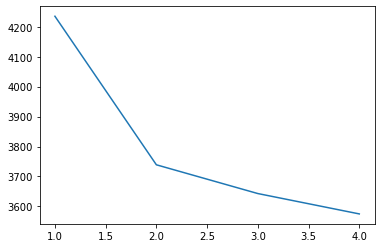

In [12]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)